In [6]:
import pandas as pd

results_file = "results/r_20240725_1521.csv"

df = pd.read_csv(results_file)
df.head()

,cv-folds,dataset,estimator,omics,train_accuracy,test_accuracy,fss_nogueira,avg_features,all_features,runs
0,5,BLCA,LR_f10,__ALL__,0.772895,0.734689,0.581696,12.000000,100451,15
1,5,BLCA,LR_f25,__ALL__,0.823952,0.762554,0.543133,20.600000,100451,15
2,5,BLCA,LR_f100,__ALL__,0.974480,0.821075,0.464228,92.733333,100451,15
3,5,BLCA,SVM_f10,__ALL__,0.774203,0.735566,0.583024,12.266667,100451,15
4,5,BLCA,SVM_f25,__ALL__,0.834205,0.773046,0.524340,24.533333,100451,15


<ipython-input-47-b88b7211daa0>:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


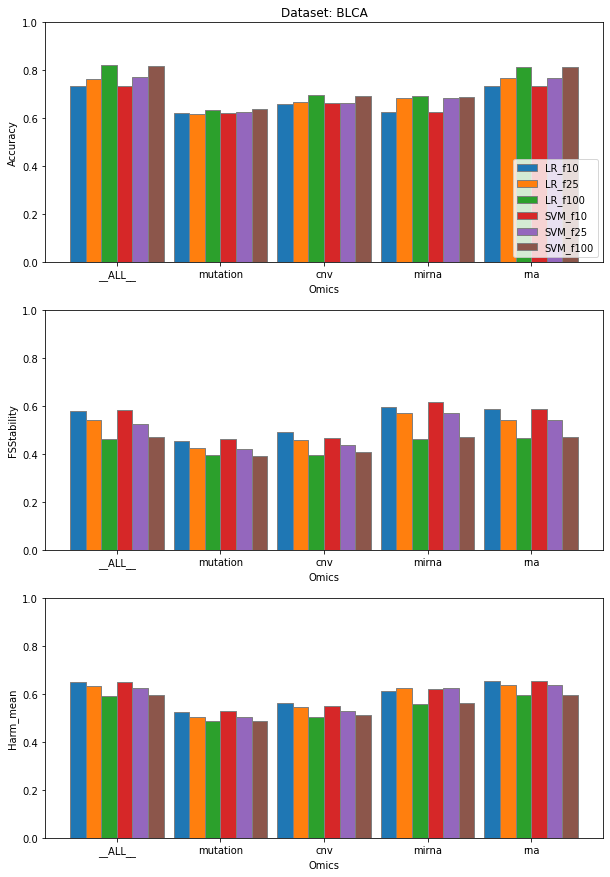

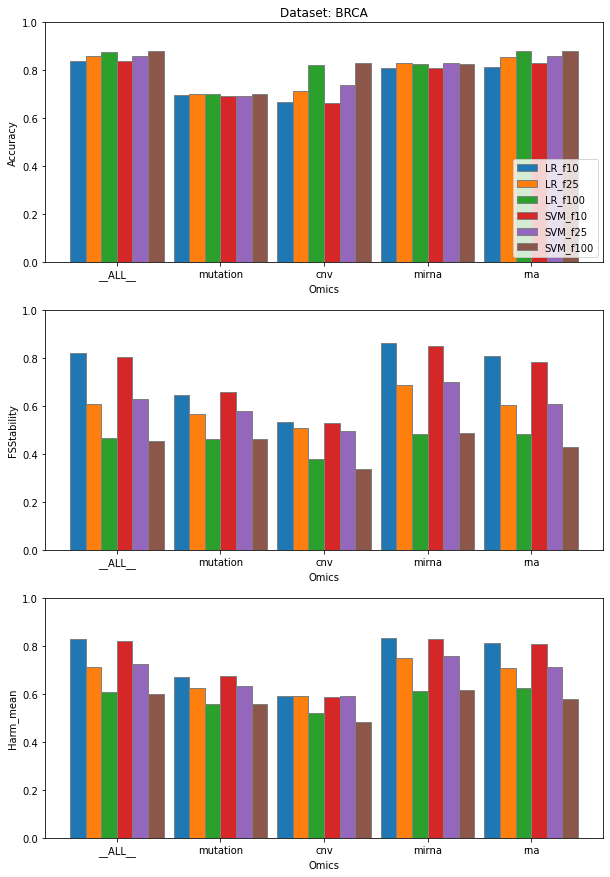

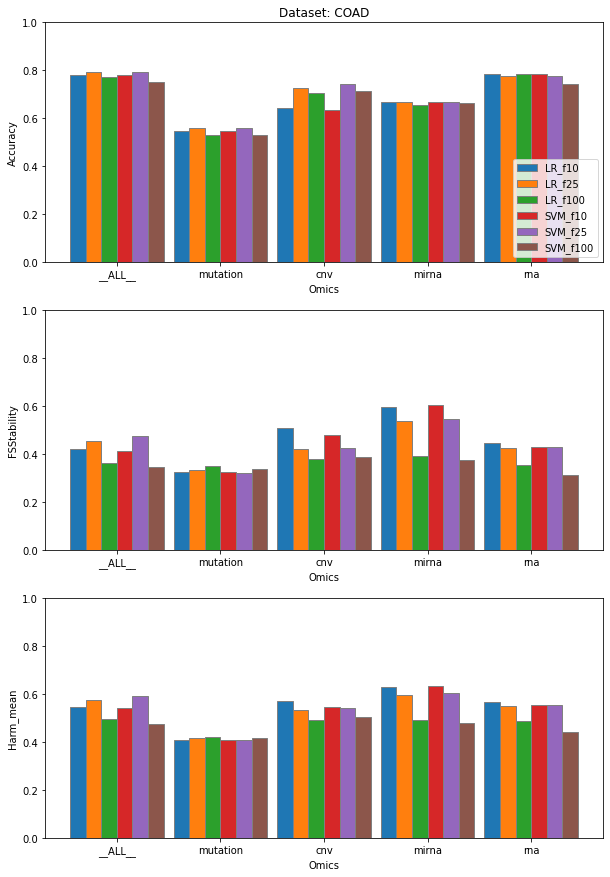

In [47]:
# ustalony dataset, wszystkie estimators
# -- test_accuracy dla różnych omics
# -- fss_nogueira dla różnych omics
# -- srednia harmoniczna dla różnych omics

import matplotlib.pyplot as plt
import numpy as np

barWidth = 0.15

omics = list(df.omics.unique())
ind = np.arange(len(omics))

for dataset in df.dataset.unique():
    df_dataset = df[df.dataset == dataset]
    fig, axes = plt.subplots(3, 1, figsize = (10, 15))
    ax_acc, ax_fss, ax_harm = axes
    ax_acc.set_title(f"Dataset: {dataset}")
    ax_acc.set_xlabel("Omics")
    ax_acc.set_ylabel("Accuracy")
    ax_acc.set_ylim([0, 1.0])
    ax_fss.set_xlabel("Omics")
    ax_fss.set_ylabel("FSStability")
    ax_fss.set_ylim([0, 1.0])
    ax_harm.set_xlabel("Omics")
    ax_harm.set_ylabel("Harm_mean")
    ax_harm.set_ylim([0, 1.0])
    for i,estimator in enumerate(df_dataset.estimator.unique()):
        df_dataset_estimator = df_dataset[df_dataset.estimator == estimator]
        acc = np.array([df_dataset_estimator[df_dataset_estimator.omics == o].iloc[0].test_accuracy for o in omics])
        fss = np.array([df_dataset_estimator[df_dataset_estimator.omics == o].iloc[0].fss_nogueira for o in omics])
        harm = 2/(1/acc + 1/fss)
        ax_acc.bar(
            ind+i*barWidth, acc,
            width = barWidth,
            edgecolor = 'grey',
            label = f'{estimator}'
        )
        ax_fss.bar(
            ind+i*barWidth, fss,
            width = barWidth,
            edgecolor = 'grey',
            label = f'{estimator}'
        )
        ax_harm.bar(
            ind+i*barWidth, harm,
            width = barWidth,
            edgecolor = 'grey',
            label = f'{estimator}'
        )
    ax_acc.set_xticks(ind+barWidth*len(ind)/2)
    ax_acc.set_xticklabels(omics)
    ax_acc.legend(loc='lower right')
    ax_fss.set_xticks(ind+barWidth*len(ind)/2)
    ax_fss.set_xticklabels(omics)
    ax_harm.set_xticks(ind+barWidth*len(ind)/2)
    ax_harm.set_xticklabels(omics)
    fig.show()